<a href="https://colab.research.google.com/github/1998456/Doc.Daves-Portfolio-/blob/main/Company_Profit_Pred_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules;

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [33]:
Cpd=pd.read_csv("https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv")
Cpd.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
Cpd.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


# Data_Accessment

In [35]:
Cpd.shape

(1000, 5)

In [36]:
Cpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [37]:
Cpd.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

# Feature_Engenerring;

ENCODING

In [38]:
Cpd['State'].value_counts()

State
California    344
New York      334
Florida       322
Name: count, dtype: int64

In [39]:
Cpd.replace({'State':{'California':0,'New York':1,'Florida':2}},inplace=True)

In [40]:
Cpd.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# EDA

<Axes: >

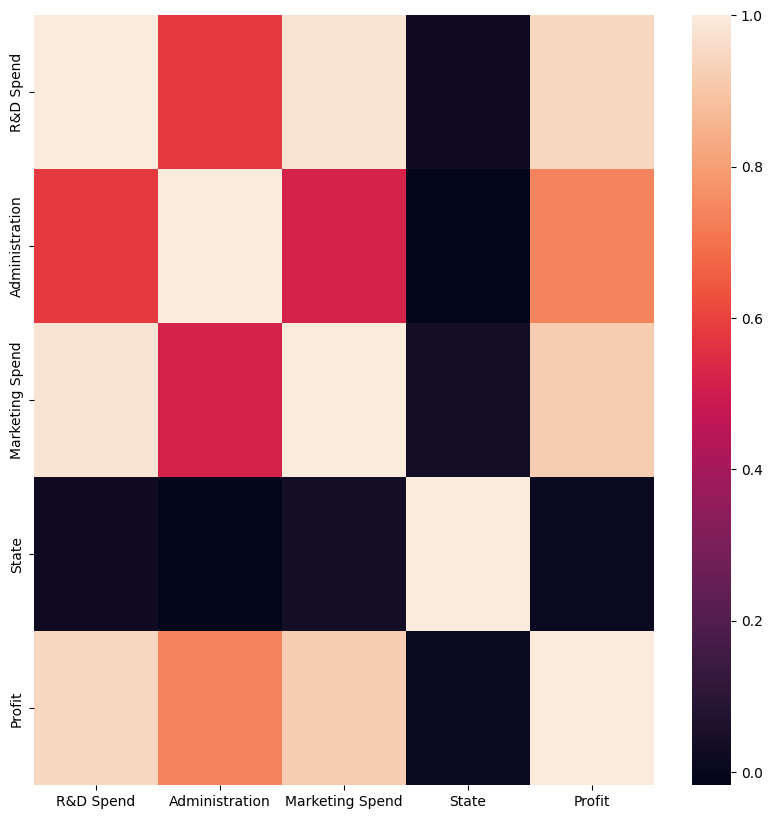

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(Cpd.corr())

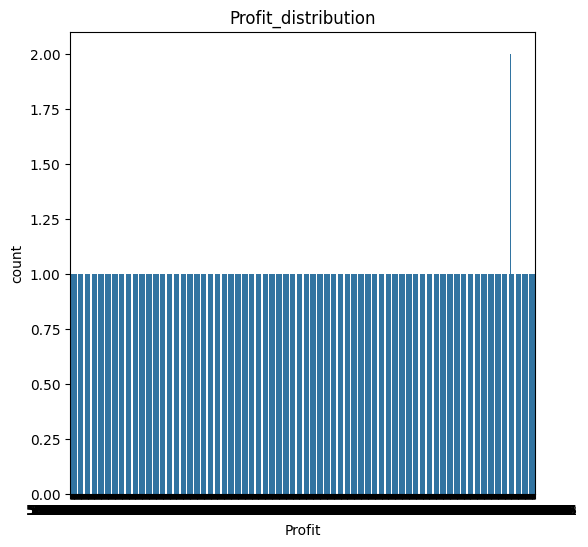

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='Profit',data=Cpd)
plt.title("Profit_distribution")
plt.show()

In [43]:
Cpd.groupby('Profit').mean()

,R&D Spend,Administration,Marketing Spend,State
Profit,,,,
14681.40000,0.00,116983.8000,45173.060,0.0
35673.41000,542.05,51743.1500,0.000,1.0
42559.73000,0.00,135426.9200,0.000,0.0
49490.75000,1315.46,115816.2100,297114.460,2.0
50070.86316,1215.00,110636.5323,71123.385,1.0
...,...,...,...,...
191792.06000,162597.70,151377.5900,443898.530,0.0
192261.83000,165349.20,136897.8000,471784.100,1.0
333962.19000,128456.23,321652.1400,281692.320,0.0


# Feature_selection

In [44]:
x= Cpd.drop('Profit',axis=1)

In [45]:
y=Cpd['Profit']

In [46]:
print (x)

     R&D Spend  Administration  Marketing Spend  State
0    165349.20      136897.800      471784.1000      1
1    162597.70      151377.590      443898.5300      0
2    153441.51      101145.550      407934.5400      2
3    144372.41      118671.850      383199.6200      1
4    142107.34       91391.770      366168.4200      2
..         ...             ...              ...    ...
995   54135.00      118451.999      173232.6695      0
996  134970.00      130390.080      329204.0228      0
997  100275.47      241926.310      227142.8200      0
998  128456.23      321652.140      281692.3200      0
999  161181.72      270939.860      295442.1700      1

[1000 rows x 4 columns]


In [47]:
print (y)

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64


# Data_Splitting

In [48]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
# Confirm_Split;
(x.shape,x_train.shape,x_test.shape)

((1000, 4), (800, 4), (200, 4))

# Model_Building

In [50]:
LG=LinearRegression ()

# Model_Training

In [51]:
LG.fit(x_train,y_train)

LinearRegression()

# Model_Evaluation

In [52]:
# Testing on train_data;
lg_train_pred= LG.predict(x_train)
#accuracy= accuracy_score (lg_train_pred,y_train)

In [53]:
Urprint("Accuracy of train_data is;", accuracy)

NameError: name 'accuracy' is not defined

In [ ]:
# Testing on test_data;
lg_test_pred= LG.predict(x_test)
#accuracy= accuracy_score (lg_test_pred,y_test)

In [ ]:
print("Accuracy of test_data is;", accuracy)

# Predictive_System

In [ ]:
Nd=(153441.51,101145.55,407934.54,2)

Nd_np= np.asarray(Nd)

Nd_reshaped= Nd_np.reshape(1,-1)

prediction= LG.predict(Nd_reshaped)
print(prediction)

print("The profit is;" ,prediction [0])